In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import gmaps
import requests
import json
#from config import gkey
from IPython.display import display
import ipywidgets as widgets
import calmap
import scipy.stats as st
from scipy.stats import linregress

[Text(0.5, 1.0, 'Delhi AQI 2020')]

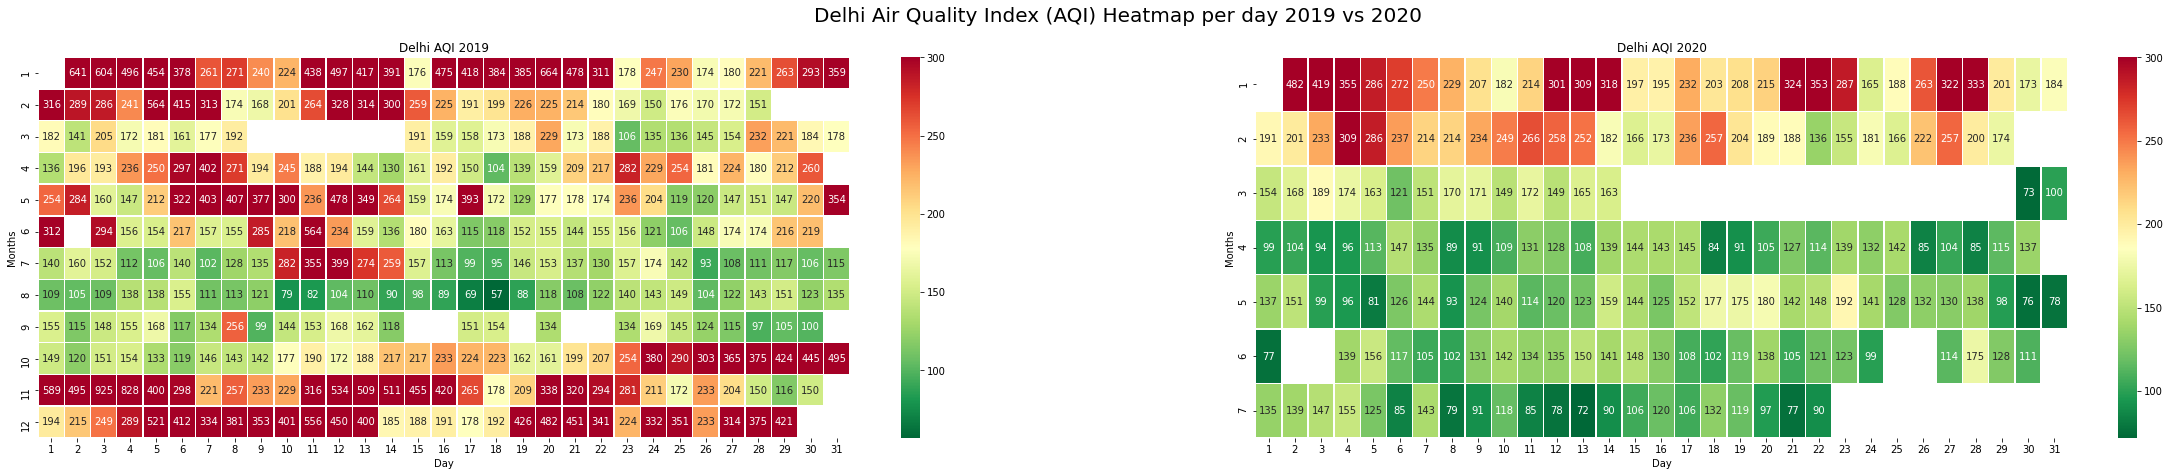

In [48]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(40, 7))
sns.heatmap(delhi2019aq, annot=True, fmt="g", linewidths=.5, ax=ax1, vmax=300, cmap = "RdYlGn_r")
sns.heatmap(delhi2020aq, annot=True, fmt="g", linewidths=.5, ax=ax2, vmax=300, cmap = "RdYlGn_r")

fig.suptitle("Delhi Air Quality Index (AQI) Heatmap per day 2019 vs 2020", fontsize = 20)
ax1.set(xlabel="Day")
ax2.set(xlabel="Day")
ax1.set(ylabel="Months")
ax2.set(ylabel="Months")
ax1.set(title="Delhi AQI 2019")
ax2.set(title="Delhi AQI 2020")

In [49]:
## Attempt with creating new dataframes ##

In [50]:
delhi_df = pd.read_csv("../CleanDatasets/delhi_AQI.csv")
delhi_df.head()

,date,pm25,pm10,o3,no2,so2,co,AQI
0,2020-07-02,139,87,17,13,9,14,139
1,2020-07-03,147,93,13,14,10,14,147
2,2020-07-04,155,71,10,11,9,12,155
3,2020-07-05,125,43,11,10,8,12,125
4,2020-07-06,85,68,5,12,8,12,85


In [51]:
delhi_2019 =delhi_df[(delhi_df['date']>='2019-01-01') & (delhi_df['date']<='2019-12-31')]

In [52]:
delhi_2019 = delhi_2019.sort_values('date')
delhi_2019.head()

,date,pm25,pm10,o3,no2,so2,co,AQI
450,2019-01-02,414,641,9,49,12,29,641
451,2019-01-03,480,604,10,39,9,27,604
452,2019-01-04,496,354,6,30,7,16,496
453,2019-01-05,352,454,11,38,10,19,454
454,2019-01-06,378,204,9,30,8,15,378


In [53]:
delhi_2019[['year','month','day']] = delhi_2019['date'].str.split('-',expand=True)
delhi_2019.head()

,date,pm25,pm10,o3,no2,so2,co,AQI,year,month,day
450,2019-01-02,414,641,9,49,12,29,641,2019,01,02
451,2019-01-03,480,604,10,39,9,27,604,2019,01,03
452,2019-01-04,496,354,6,30,7,16,496,2019,01,04
453,2019-01-05,352,454,11,38,10,19,454,2019,01,05
454,2019-01-06,378,204,9,30,8,15,378,2019,01,06


In [54]:
delhi_2019['day'] = delhi_2019['day'].astype(str).astype('int64')
delhi_2019['year'] = delhi_2019['year'].astype(str).astype('int64')
delhi_2019['month'] = delhi_2019['month'].astype(str).astype(int)

In [55]:
delhi_2019['AQI'].max()

925

In [56]:
delhi_2019aq = delhi_2019.pivot_table('AQI','month','day')

Text(0.5, 42.0, 'Day')

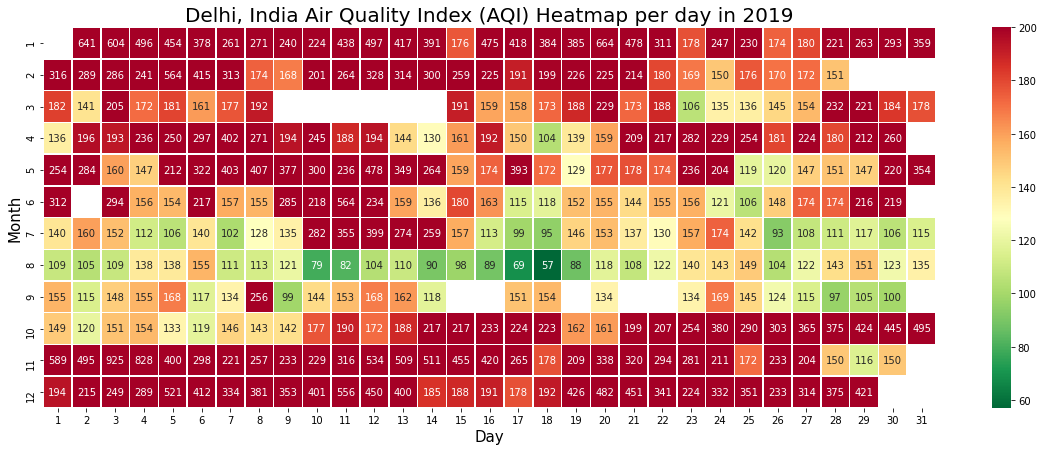

In [64]:
f1, ax = plt.subplots(figsize=(20, 7))
sns.heatmap(delhi_2019aq, annot=True, fmt="g", linewidths=.5, ax=ax, vmax=200, cmap = "RdYlGn_r")
plt.title("Delhi, India Air Quality Index (AQI) Heatmap per day in 2019", fontsize=20)
plt.ylabel("Month", fontsize=15)
plt.xlabel("Day", fontsize=15)
#plt.savefig("2019_DelhiAQI_CalendarHeatmap.png")

In [58]:
delhi_2020 =delhi_df[(delhi_df['date']>='2020-01-01') & (delhi_df['date']<='2020-12-31')]
delhi_2020 = delhi_2020.sort_values('date')
delhi_2020.head()

,date,pm25,pm10,o3,no2,so2,co,AQI
153,2020-01-02,444,482,4,14,9,27,482
154,2020-01-03,419,377,3,12,8,25,419
155,2020-01-04,355,245,4,14,4,21,355
156,2020-01-05,286,204,4,12,4,16,286
157,2020-01-06,272,197,3,10,4,17,272


In [59]:
delhi_2020[['year','month','day']] = delhi_2020['date'].str.split('-',expand=True)
delhi_2020.head()

,date,pm25,pm10,o3,no2,so2,co,AQI,year,month,day
153,2020-01-02,444,482,4,14,9,27,482,2020,01,02
154,2020-01-03,419,377,3,12,8,25,419,2020,01,03
155,2020-01-04,355,245,4,14,4,21,355,2020,01,04
156,2020-01-05,286,204,4,12,4,16,286,2020,01,05
157,2020-01-06,272,197,3,10,4,17,272,2020,01,06


In [60]:
delhi_2020['day'] = delhi_2020['day'].astype(str).astype('int64')
delhi_2020['year'] = delhi_2020['year'].astype(str).astype('int64')
delhi_2020['month'] = delhi_2020['month'].astype(str).astype(int)

In [61]:
delhi_2020['AQI'].max()

482

In [62]:
delhi_2020aq = delhi_2020.pivot_table('AQI','month','day')

Text(0.5, 42.0, 'Day')

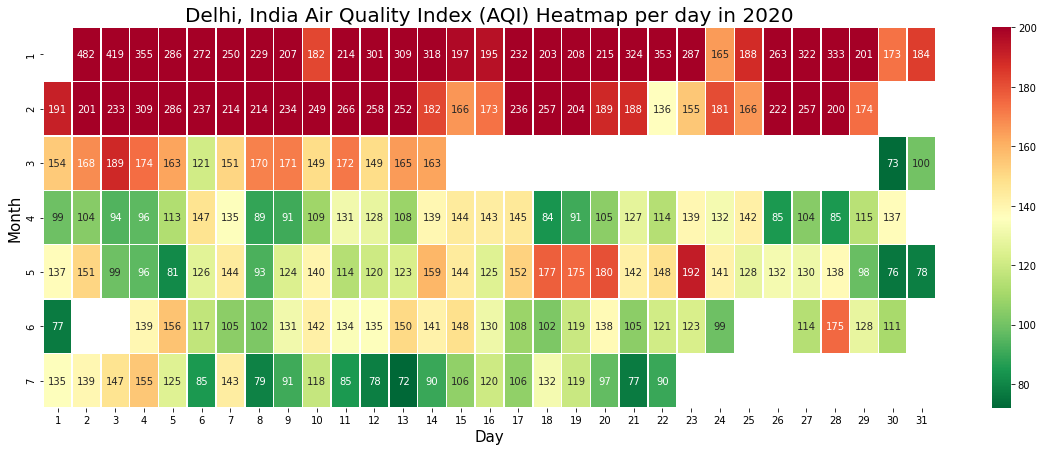

In [65]:
f1, ax = plt.subplots(figsize=(20, 7))
sns.heatmap(delhi_2020aq, annot=True, fmt="g", linewidths=.5, ax=ax, vmax=200, cmap = "RdYlGn_r")
plt.title("Delhi, India Air Quality Index (AQI) Heatmap per day in 2020", fontsize=20)
plt.ylabel("Month", fontsize=15)
plt.xlabel("Day", fontsize=15)
#plt.savefig("2020_DelhiAQI_CalendarHeatmap.png")

The r-squared is: 0.00047677240710032777
The correlation coefficient between 2019 calendar month and AQI in Delhi, India is 0.02


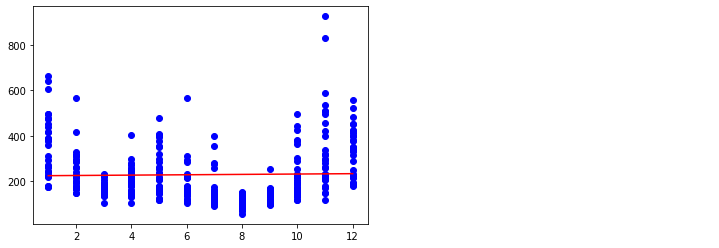

In [70]:
x = delhi_2019['month']
y = delhi_2019['AQI']

xy_corr = round(st.pearsonr(x,y)[0], 2)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y, marker="o", facecolor="b")
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(20,25),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")
print(f"The correlation coefficient between 2019 calendar month and AQI in Delhi, India is {xy_corr}")


The r-squared is: 0.5222943136096891
The correlation coefficient between 2020 calendar month and AQI in Delhi, India is -0.72


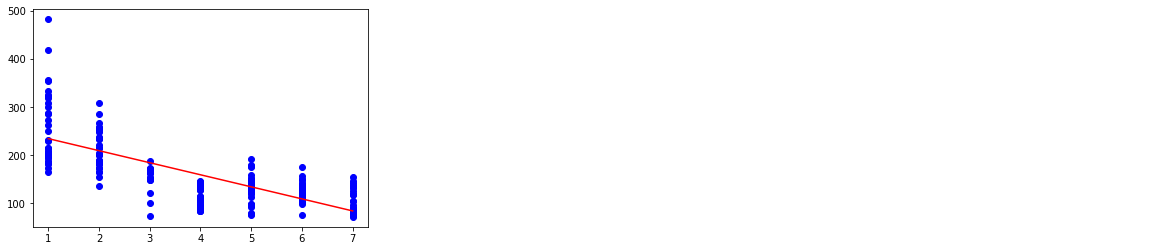

In [71]:
x1 = delhi_2020['month']
y1 = delhi_2020['AQI']

xy1_corr = round(st.pearsonr(x1,y1)[0], 2)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x1,y1)
regress_values = x1 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x1, y1, marker="o", facecolor="b")
plt.plot(x1,regress_values,"r-")
plt.annotate(line_eq,(20,25),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")
print(f"The correlation coefficient between 2020 calendar month and AQI in Delhi, India is {xy1_corr}")


In [89]:
dsect19 = delhi_2019[(delhi_2019['month'] >= 3) & (delhi_2019['month'] <= 5)]

The r-squared is: 0.12242136160900607
The correlation coefficient between 2019 calendar month and AQI in Delhi, India is 0.35


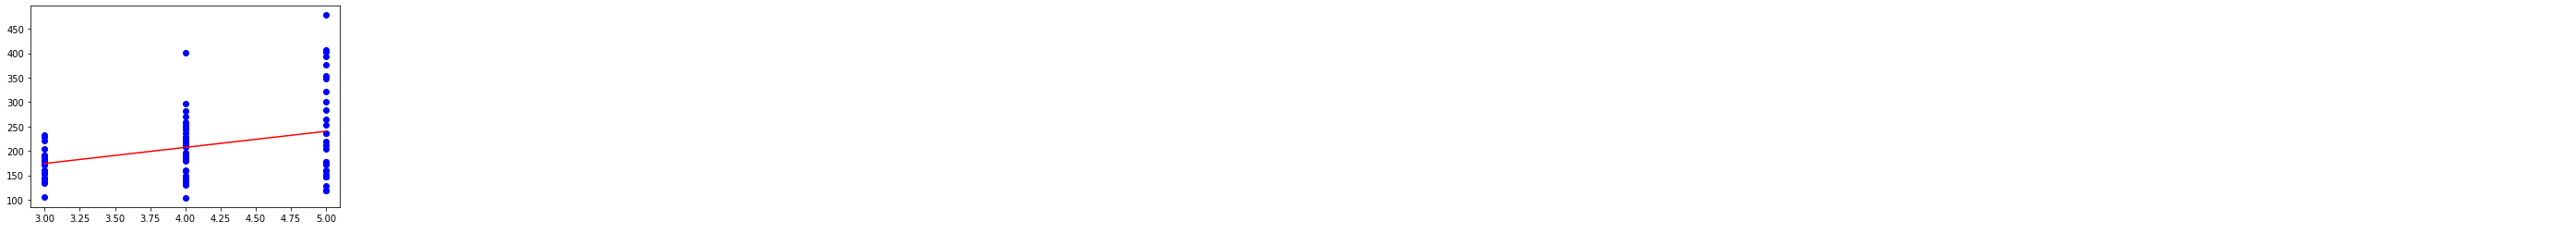

In [90]:
x19 = dsect19['month']
y19 = dsect19['AQI']

xy19_corr = round(st.pearsonr(x19,y19)[0], 2)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x19,y19)
regress_values = x19 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x19, y19, marker="o", facecolor="b")
plt.plot(x19,regress_values,"r-")
plt.annotate(line_eq,(20,25),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")
print(f"The correlation coefficient between 2019 calendar month and AQI in Delhi, India is {xy19_corr}")


In [91]:
dsect20 = delhi_2020[(delhi_2020['month'] >= 3) & (delhi_2020['month'] <= 5)]

The r-squared is: 0.032761931844492116
The correlation coefficient between 2019 calendar month and AQI in Delhi, India is -0.18


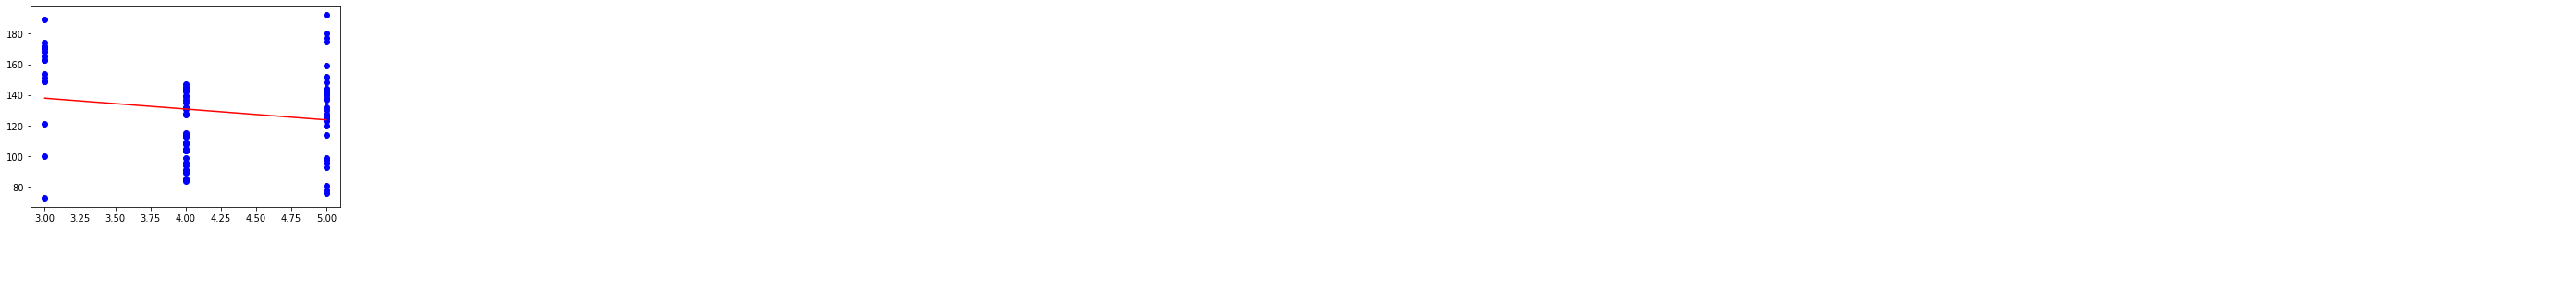

In [92]:
x20 = dsect20['month']
y20 = dsect20['AQI']

xy20_corr = round(st.pearsonr(x20,y20)[0], 2)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x20,y20)
regress_values = x20 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x20, y20, marker="o", facecolor="b")
plt.plot(x20,regress_values,"r-")
plt.annotate(line_eq,(20,25),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")
print(f"The correlation coefficient between 2019 calendar month and AQI in Delhi, India is {xy20_corr}")
